Movie Analysis
I was tasked with looking at how runtime impacts movie ratings. To begin my search our group agreed to remove all movies with a runtime less than an hour because we wanted to focus on movies rather than short films. I then looked at runtimes in 15 minute increments between 60 minutes and 240 minutes. When I counted the values for each bin of runtimes, I saw that there were only 40 movies in our data set that were 180 minutes or longer. Considering our initial data was over 11000 movies I decided to remove those movies and focus on movies between 1 and 3 hours. I then created a bar graph once more to visualize the data of just movies between 60 minutes and 180 minutes and I did not feel it gave me a very clear picture of potential outliers. I then created a box plot based on the runtime groups at 10 minute increments which gave me a much better idea of outliers and ranges for the data. I ran an ANOVA test and set the p-value to .05. The null hypothesis was that there is no correlation between runtime and movie rating. The ANOVA test returned a p-value of 4.66e-311 so I rejected the null hypothesis that there is no correlation between movie rating and runtime. I then ran a linear regression on Runtime and IMDb ratings and the graph was quite messy and there was a weak positive correlation, R squared value of .098. I then ran a linear regression line and plotted the average score of all movies at each runtime and it returned and R-Squared value of .19. Based on the data, there seems to be a weak positive correlation between runtime and movie rating.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [3]:
#read in csv and create dataframe
movie_df = pd.read_csv("Output/no_lie_for_real_left_off_here.csv")
movie_df.dtypes

Title               object
Year                 int64
Rated               object
Released            object
Runtime            float64
Genre               object
Director            object
Writer              object
Actors              object
Plot                object
Metascore          float64
imdbRating         float64
Rotten Tomatoes    float64
imdbVotes           object
BoxOffice           object
dtype: object

In [4]:
#get list of runtimes for grouping and cleaning purposes
movie_df['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71.,  23.,
       173., 112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149.,
       174., 238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158.,
       231., 153., 189., 154., 172., 159., 179.,  55.,  60.,  68., 178.,
       166., 160., 171., 170., 167., 176., 186., 208., 183., 184.,  17.,
       182.,  64.,  nan,  61.,  65.,  50.,  16.,  44.,  67.,   6.,  20.,
        15.,  12.,   9.,   5.,  62.,  14.,  11.])

In [5]:
#remove movies with run time under an hour
movie_60 = movie_df.loc[movie_df['Runtime'] > 59]
movie_60['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71., 173.,
       112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149., 174.,
       238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158., 231.,
       153., 189., 154., 172., 159., 179.,  60.,  68., 178., 166., 160.,
       171., 170., 167., 176., 186., 208., 183., 184., 182.,  64.,  61.,
        65.,  67.,  62.])

In [6]:
#Drop movies with no IMDB Rating
cleaned_movie = movie_60[movie_60['imdbRating'].notna()]

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_6304/2987709017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_6304/2987709017.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


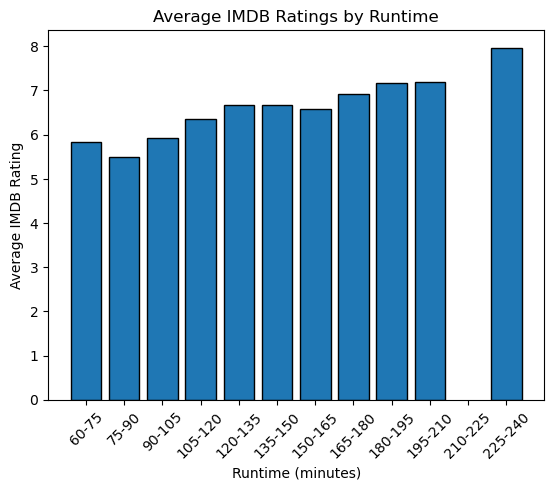

In [7]:
#Establish bins and labels for bins
bins = [0, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.savefig("zach_images/initial_bar_graph.png")
plt.show()

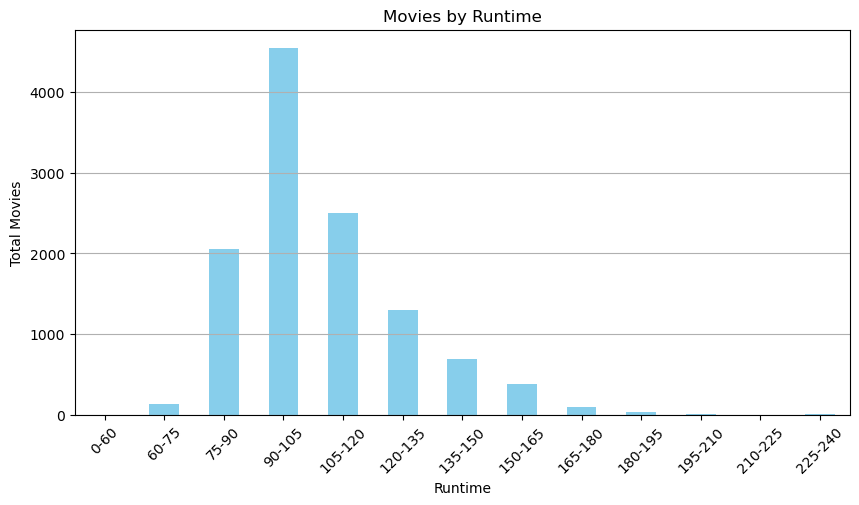

In [8]:
#Make a Bar graph of movies per each runtime
# count occurences of runtime for each group
runtime_counts = cleaned_movie['Runtime Group'].value_counts()

# Sort the index (runtime groups) to ensure they are in order
runtime_counts = runtime_counts.sort_index()

# Create a bar graph
runtime_counts.plot(kind='bar', figsize=(10, 5), color='skyblue', rot=45)

# Format bar graph
plt.title('Movies by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Total Movies')

# add grid and save image
plt.grid(axis='y')
plt.show()

In [9]:
# Count movies in each bin
cleaned_movie['Runtime Group'].value_counts()

Runtime Group
90-105     4547
105-120    2501
75-90      2058
120-135    1296
135-150     687
150-165     386
60-75       129
165-180     101
180-195      31
195-210       6
225-240       3
0-60          0
210-225       0
Name: count, dtype: int64

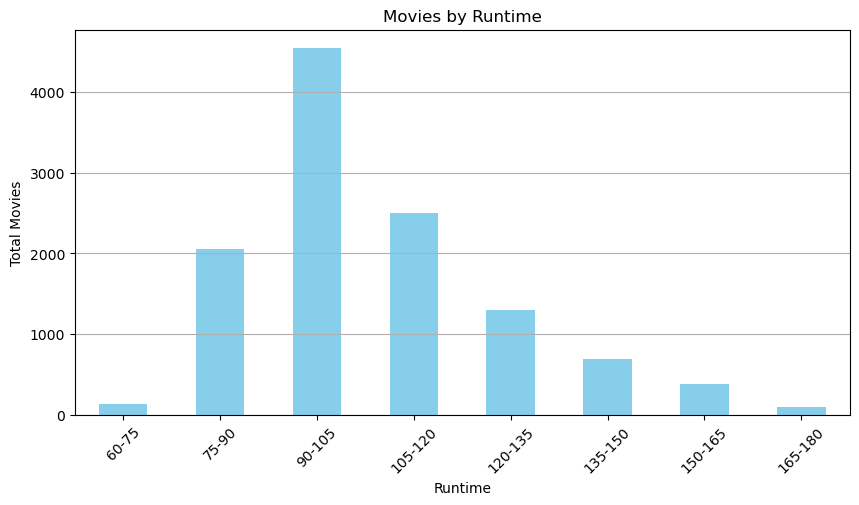

In [10]:
#Make a Bar graph of movies between 60-180 minutes

#cut out movies over 180 minutes
movie_180 = cleaned_movie.loc[cleaned_movie['Runtime'] < 180]

# count occurences of runtime for each group
runtime_counts = movie_180['Runtime Group'].value_counts()

# Filter out empty columns
runtime_counts = runtime_counts[runtime_counts > 0]

# Sort the index (runtime groups) to ensure they are in order
runtime_counts = runtime_counts.sort_index()

# Create a bar graph
runtime_counts.plot(kind='bar', figsize=(10, 5), color='skyblue', rot=45)

# Format bar graph
plt.title('Movies by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Total Movies')

# Display grid
plt.grid(axis='y')

#save image
plt.savefig("zach_images/movies_by_reduced_runtime.png")

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_6304/1875664087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_6304/1875664087.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


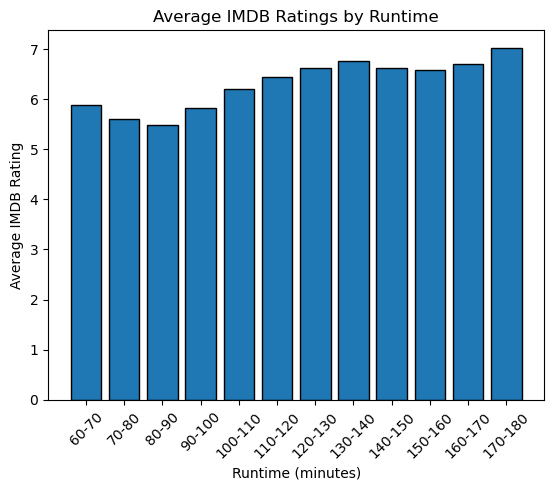

In [11]:
#Establish bins and labels for bins
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

In [12]:
#Begin code for Box plot to identify potential outliers

#separate movies into groups by 10 minute increments rom 60 - 180 minutes
reduced_runtime_0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 70)]
reduced_runtime_1 = cleaned_movie[(cleaned_movie['Runtime'] >=71) & (cleaned_movie['Runtime'] <= 80)]
reduced_runtime_2 = cleaned_movie[(cleaned_movie['Runtime'] >=81) & (cleaned_movie['Runtime']<= 90)]
reduced_runtime_3 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 100)]
reduced_runtime_4 = cleaned_movie[(cleaned_movie['Runtime'] >=101) & (cleaned_movie['Runtime']<= 110)]
reduced_runtime_5 = cleaned_movie[(cleaned_movie['Runtime'] >=111) & (cleaned_movie['Runtime']<= 120)]
reduced_runtime_6 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 130)]
reduced_runtime_7 = cleaned_movie[(cleaned_movie['Runtime'] >=131) & (cleaned_movie['Runtime']<= 140)]
reduced_runtime_8 = cleaned_movie[(cleaned_movie['Runtime'] >=141) & (cleaned_movie['Runtime']<= 150)]
reduced_runtime_9 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 160)]
reduced_runtime_10 = cleaned_movie[(cleaned_movie['Runtime'] >=161) & (cleaned_movie['Runtime']<= 170)]
reduced_runtime_11 = cleaned_movie[(cleaned_movie['Runtime'] >=171) & (cleaned_movie['Runtime']<= 180)]


#grab IMDB Rating for all movies in each runtime group
reduced_group0 = reduced_runtime_0['imdbRating']
reduced_group1 = reduced_runtime_1['imdbRating']
reduced_group2 = reduced_runtime_2['imdbRating']
reduced_group3 = reduced_runtime_3['imdbRating']
reduced_group4 = reduced_runtime_4['imdbRating']
reduced_group5 = reduced_runtime_5['imdbRating']
reduced_group6 = reduced_runtime_6['imdbRating']
reduced_group7 = reduced_runtime_7['imdbRating']
reduced_group8 = reduced_runtime_8['imdbRating']
reduced_group9 = reduced_runtime_9['imdbRating']
reduced_group10 = reduced_runtime_10['imdbRating']
reduced_group11 = reduced_runtime_11['imdbRating']

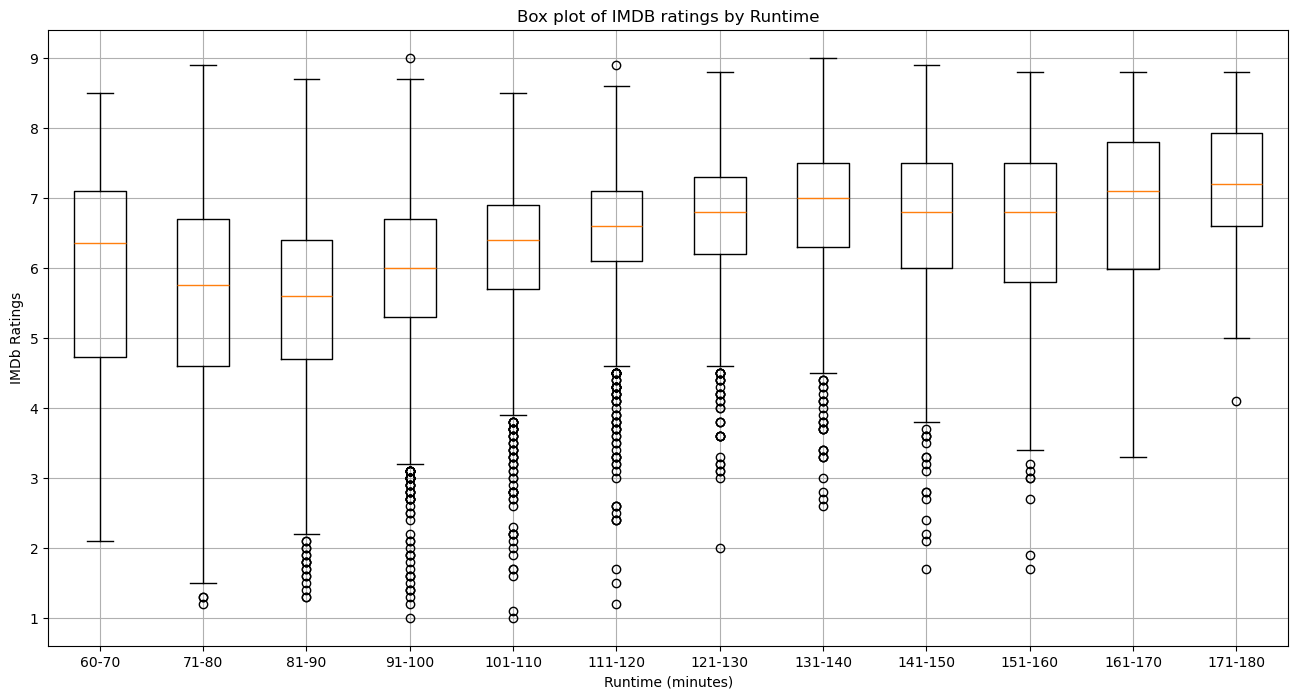

In [13]:
#put runtime group into list
ratings_groups = [
    reduced_group0,
    reduced_group1,
    reduced_group2,
    reduced_group3,
    reduced_group4,
    reduced_group5,
    reduced_group6,
    reduced_group7,
    reduced_group8,
    reduced_group9,
    reduced_group10,
    reduced_group11
]
#create boxplot
plt.figure(figsize=(16,8))
plt.boxplot(ratings_groups, labels=[
    '60-70', '71-80', '81-90', '91-100',
    '101-110', '111-120', '121-130', '131-140',
    '141-150', '151-160', '161-170', '171-180'
])
#Set title and labels
plt.title('Box plot of IMDB ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Ratings')

#Show Box Plot and save image 
plt.grid(True)
plt.savefig("zach_images/box_plot_runtime.png")

In [14]:
#run ANOVA test at p_value .05
stats.f_oneway(reduced_group0, reduced_group1, reduced_group2, reduced_group3, reduced_group4, reduced_group5, reduced_group6,
    reduced_group7, reduced_group8, reduced_group9, reduced_group10,reduced_group11)


F_onewayResult(statistic=143.4345385114274, pvalue=4.6663005227817e-311)

The r-squared value is 0.0982160088961551


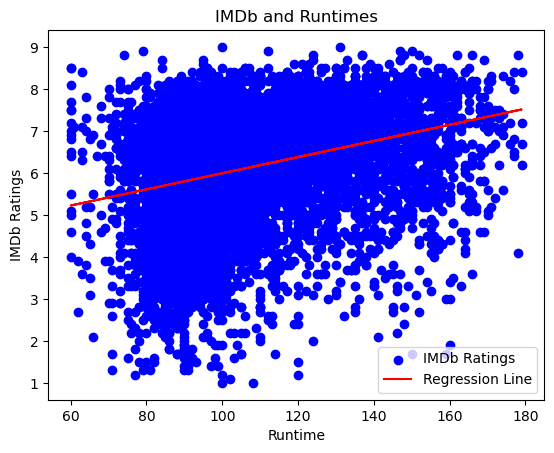

In [15]:
#Creating Linear Regression for all movies

# Assign Runtime to X value and Rating to Y value for linear regression
x_values = movie_180['Runtime']
y_values = movie_180['imdbRating']

#Set linear regression formula
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#set regression formula into a variable
regress_values = x_values * slope + intercept

#Create scatter plot and linear regression line
plt.scatter(x_values, y_values, color='blue', label="IMDb Ratings")
plt.plot(x_values, regress_values, color='red', label='Regression Line')

#Format Scatter plot
plt.xlabel("Runtime")
plt.ylabel("IMDb Ratings")
plt.title("IMDb and Runtimes")

#Calculate and print R squared value
print(f"The r-squared value is {r_value**2}")

#add legend and save image
plt.legend()
plt.savefig("zach_images/linear_regression_allmovies.png")

The r-squared value is 0.19236268820972977


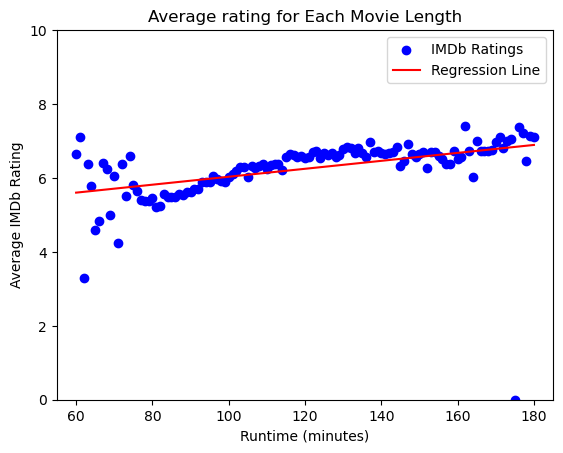

In [16]:
#set minute lists for range of runtimes
min_list = [i for i in range(60,181)]

#set lists to track runtime and average scores for each run time
avg_runtime_list = []
avg_scores_list = []
# For loop to pull the average score for each runtime
for i in range(60, 181):
    avg_scores = cleaned_movie.loc[(cleaned_movie['Runtime'] == i), 'imdbRating'].mean()
    
    # Append runtime to list
    avg_runtime_list.append(i)
    
    # Check if avg_scores is NaN before appending
    if pd.isna(avg_scores):
        avg_scores_list.append(0) 
    else:
        avg_scores_list.append(avg_scores) # Append the average score
# Assign Runtime to X value and scores to Y value for linear regression
x_values = avg_runtime_list
y_values = avg_scores_list

#Create linear regression formula
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#Calculate regresion values
regress_values = [slope * x + intercept for x in x_values] 

#Create scatter plot and linear regression line
plt.scatter(x_values, y_values, color='blue', label="IMDb Ratings") 
plt.plot(x_values, regress_values, color='red', label='Regression Line')

#Format Scatter plot
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDb Rating')
plt.title('Average rating for Each Movie Length')
plt.ylim(0, 10)
plt.xlim(55, 185)
#Calculate and print R squared valued
print(f"The r-squared value is {r_value**2}")

#Put legend and save image
plt.legend()
plt.savefig("zach_images/linear_regression_runtime.png")